το προγραμμα αργει πολυ να δωσει αποτελεσμα οπότε εκτυπώνω κάποια ενδεικτικά 
για window size = 3: 


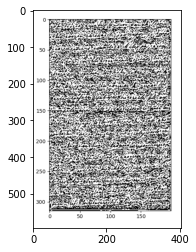

για window size = 7: 


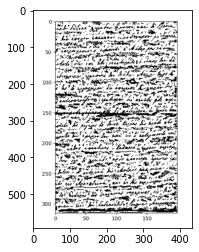

για window size = 15: 


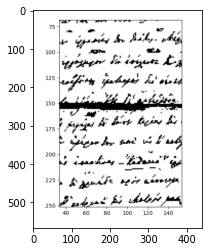

KeyboardInterrupt: 

In [1]:
import sys
import numpy as np 
from PIL import Image
from matplotlib import pyplot as plt


#upologismos geitonias pixel
def upologismos_geitonias(x,y,window_size,A):

    mid=window_size//2

    #even window size
    if(window_size%2==0):
        y1=mid
        y2=mid-1
        x1=mid-1
        x2=mid

    #odd window size
    else:
        y1=mid
        y2=mid
        x1=mid
        x2=mid

    for l in range(1,y1+1):
        if y-l<0:
            y1-=1
            y2+=1
    for r in range(1,y2+1):
        if y+r>=len(A[0]):
            y1+=1
            y2-=1
    for u in range(1,x1+1):

        if x-u<0:
            x2+=1
            x1-=1
    for d in range(1,x2+1):
        if x+d>=len(A):
            x2-=1
            x1+=1
    B=np.array(A[(x-x1):(x+x2+1),(y-y1):(y+y2+1)])	
    return B

def antikeimenikh_otsu(geitonia,i):

    part1=[]
    part2=[]
    for x in range(len(geitonia)):
        for y in range(len(geitonia[0])):
            if len(geitonia.shape)==3:
                pixel=(int(geitonia[x][y][0])+int(geitonia[x][y][1])+int(geitonia[x][y][2]))/3 
            else:
                pixel=geitonia[x][y]
            if pixel<i:
                part1.append(geitonia[x][y])
            else:
                part2.append(geitonia[x][y])
    if len(part1)==0:
        mu1=0
    else:
        mu1=np.mean(part1)
    if len(part2)==0:
        mu2=0
    else:
        mu2=np.mean(part2)
    mu=np.mean(geitonia.flatten())

    pi1=len(part1)/(len(part1)+len(part2))
    pi2=len(part2)/(len(part1)+len(part2))

    otsu=(pi1*((mu1-mu)**2)+pi2*((mu2-mu)**2))
    return otsu


def best_threshold(geitonia):
    best_thr=0
    best_value=0
    for i in range(1,256):
        obj_otsu=antikeimenikh_otsu(geitonia,i)
        if(obj_otsu > best_value):
            best_thr=i
            best_value=obj_otsu
    return best_thr

def otsu_thresholding(window_size,A):
    A_cp=np.copy(A)
    for x in range(len(A)):
        for y in range(len(A[x])):

            geitonia=upologismos_geitonias(x,y,window_size,A)
            threshold=best_threshold(geitonia)
            if len(A.shape)==3: # If A.shape is equal to 3 that means that the input image is colorful
                pixel=(int(A[x][y][0])+int(A[x][y][1])+int(A[x][y][2]))/3 
            else:
                pixel=A[x][y]
            if pixel<threshold:
                A_cp[x][y]=0
            else:
                A_cp[x][y]=255
    return A_cp


A = np.array(Image.open('trikoupi6_low.png'))
window_size=3
    
print("το προγραμμα αργει πολυ να δωσει αποτελεσμα οπότε εκτυπώνω κάποια ενδεικτικά ")
window_3 = np.array(Image.open("3.png"))
print("για window size = 3: ")
plt.imshow(window_3, cmap='gray')
plt.show()

window_7 = np.array(Image.open("7.png"))
print("για window size = 7: ")
plt.imshow(window_7, cmap='gray')
plt.show()

window_15 = np.array(Image.open("15.png"))
print("για window size = 15: ")
plt.imshow(window_15, cmap='gray')
plt.show()

img_out=otsu_thresholding(window_size,A)

fig = plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np.uint8(img_out), cmap='gray')
plt.show()